In [1]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
from mplsoccer import VerticalPitch, add_image, FontManager, Sbopen
from matplotlib import pyplot as plt

In [2]:
# Spain vs Poland
MATCH_ID = 3788762
TEAM = 'Poland'

parser = Sbopen()
event, related, freeze, tactics = parser.event(MATCH_ID)

# starting players from Barcelona
starting_xi_event = event.loc[((event['type_name'] == 'Starting XI') &
                               (event['team_name'] == TEAM)), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
starting_xi = tactics.merge(starting_xi_event, on='id')
event = event.loc[((event['type_name'] == 'Ball Receipt') &
                   (event['outcome_name'].isnull()) &
                   (event['player_id'].isin(starting_xi['player_id']))
                   ), ['player_id', 'x', 'y']]
# merge on the starting positions to the events
event = event.merge(starting_xi, on='player_id')
formation = event['tactics_formation'].iloc[0]

In [26]:
starting_xi

,jersey_number,match_id,id,player_id,player_name,position_id,position_name,event_tactics_id,tactics_formation
0,1,3788762,22879fa4-de28-4a99-97f6-8078fb4dc927,5669,Wojciech Szczęsny,1,Goalkeeper,1,352
1,18,3788762,22879fa4-de28-4a99-97f6-8078fb4dc927,5673,Bartosz Bereszyński,3,Right Center Back,2,352
2,15,3788762,22879fa4-de28-4a99-97f6-8078fb4dc927,3034,Kamil Glik,4,Center Back,3,352
3,5,3788762,22879fa4-de28-4a99-97f6-8078fb4dc927,4626,Jan Bednarek,5,Left Center Back,4,352
4,21,3788762,22879fa4-de28-4a99-97f6-8078fb4dc927,4673,Kamil Jóźwiak,7,Right Wing Back,5,352
5,26,3788762,22879fa4-de28-4a99-97f6-8078fb4dc927,8737,Tymoteusz Puchacz,8,Left Wing Back,6,352
6,20,3788762,22879fa4-de28-4a99-97f6-8078fb4dc927,5660,Piotr Zieliński,10,Center Defensive Midfield,7,352
7,14,3788762,22879fa4-de28-4a99-97f6-8078fb4dc927,9622,Mateusz Andrzej Klich,13,Right Center Midfield,8,352
8,16,3788762,22879fa4-de28-4a99-97f6-8078fb4dc927,29480,Jakub Moder,15,Left Center Midfield,9,352
9,11,3788762,22879fa4-de28-4a99-97f6-8078fb4dc927,8836,Karol Świderski,22,Right Center Forward,10,352


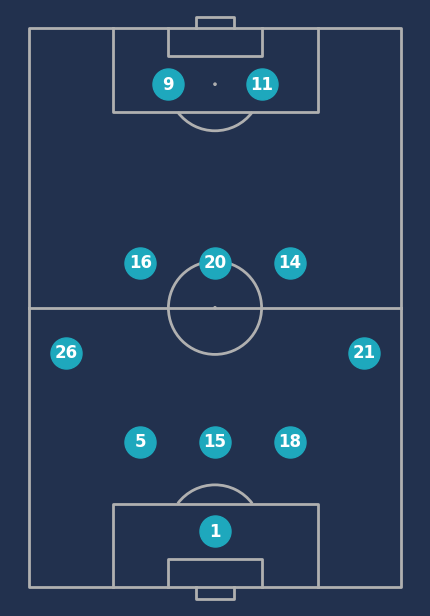

In [25]:
pitch = VerticalPitch(goal_type='box', pitch_color= '#22314E')
fig, ax = pitch.draw(figsize=(4.4, 6.4))
ax_text = pitch.formation(formation, 
                          positions=starting_xi.position_id, 
                          kind='text',
                          text=starting_xi.jersey_number,
                          va='center', 
                          ha='center', 
                          fontsize=12, 
                          ax=ax,
                          color = 'white',
                          fontdict=None,
                          weight='bold')

fig.set_facecolor('#22314E')

ax_scatter = pitch.formation(formation, 
                             positions=starting_xi.position_id, 
                             kind='scatter',
                             c='#1EA8BD',
                             s=500,
                             #xoffset=-8,
                             ax=ax)

plt.savefig('Images/formation_Euro.png')